# Sentiment Analysis on News Titles

Evaluate the tone of news titles from various media outlets.

## Data Acquisition

Data was gathered via API from [mediastack](https://mediastack.com/). [Free developer account](https://mediastack.com/product) allows up to 1000 calls per month. Sign up [here](https://mediastack.com/signup/free).

We will be using live news endpoint, documentation can be found [here](https://mediastack.com/documentation#live_news).

The data can be filtered by date, language, country, category, etc. Feel free to change those params to your needs.


In [1]:
# Package used to make http requests
import http.client, urllib.parse, json

conn = http.client.HTTPConnection('api.mediastack.com')

# Filter on news to retrieve
params = {
    # TODO: Replace with own API key
    'access_key': "",
    'languages': 'en',
    'countries': 'au',
    'date': '2023-12-25,2023-12-31',
    'categories': '-sports,-entertainment', # excluding sports & entertainment
    'limit': 100,
    'offset': 0
}

news = []

# Fetch news from mediastack until there is no more to fetch
while True:
    conn.request('GET', f"/v1/news?{urllib.parse.urlencode(params)}")
    res = conn.getresponse()
    res_text = res.read().decode()

    # append to news list
    res_json = json.loads(res_text)
    news += res_json['data']

    # update offset
    params['offset'] += 100

    # stop if there is no more news to fetch
    if params['offset'] >= res_json['pagination']['total']:
        break

conn.close()

## Data Processing & Cleaning



In [2]:
import pandas as pd

news_df = pd.DataFrame(news)

# Convert the published_at column from string to datetime
news_df['published_at'] = pd.to_datetime(news_df.published_at)

news_df

,author,title,description,url,source,image,category,language,country,published_at
0,Rob Harris,"A shocking certainty, Princess Mary’s elevatio...",The abdication announcement by Denmark’s Queen...,https://www.theage.com.au/world/europe/a-shock...,The Age,https://static.ffx.io/images/$zoom_0.1462%2C$m...,general,en,au,2023-12-31 23:52:48+00:00
1,Rob Harris,"A shocking certainty, Princess Mary’s elevatio...",The abdication announcement by Denmark’s Queen...,https://www.smh.com.au/world/europe/a-shocking...,The Sydney Morning Herald,https://static.ffx.io/images/$zoom_0.1462%2C$m...,general,en,au,2023-12-31 23:52:48+00:00
2,Rob Harris,"A shocking certainty, Princess Mary’s elevatio...",The abdication announcement by Denmark’s Queen...,https://www.brisbanetimes.com.au/world/europe/...,brisbanetimes,https://static.ffx.io/images/$zoom_0.1462%2C$m...,general,en,au,2023-12-31 23:52:48+00:00
3,Rob Harris,"A shocking certainty, Princess Mary’s elevatio...",The abdication announcement by Denmark’s Queen...,https://www.smh.com.au/world/europe/a-shocking...,The Sydney Morning Herald,https://static.ffx.io/images/$zoom_0.1462%2C$m...,general,en,au,2023-12-31 23:52:48+00:00
4,Rob Harris,"A shocking certainty, Princess Mary’s elevatio...",The abdication announcement by Denmark’s Queen...,https://www.brisbanetimes.com.au/world/europe/...,Brisbane Times,https://static.ffx.io/images/$zoom_0.1462%2C$m...,general,en,au,2023-12-31 23:52:48+00:00
...,...,...,...,...,...,...,...,...,...,...
5721,Heather McNeill,Wedge Island shark attack victim stable in hos...,A windsurfer remains in a stable condition in ...,https://www.brisbanetimes.com.au/national/west...,Brisbane Times,https://static.ffx.io/images/$zoom_3.3111%2C$m...,general,en,au,2023-12-25 00:02:36+00:00
5722,Heather McNeill,Wedge Island shark attack victim stable in hos...,A windsurfer remains in a stable condition in ...,https://www.theage.com.au/national/western-aus...,The Age,https://static.ffx.io/images/$zoom_3.3111%2C$m...,general,en,au,2023-12-25 00:02:36+00:00
5723,Heather McNeill,Wedge Island shark attack victim stable in hos...,A windsurfer remains in a stable condition in ...,https://www.watoday.com.au/national/western-au...,watoday,https://static.ffx.io/images/$zoom_3.3111%2C$m...,general,en,au,2023-12-25 00:02:36+00:00
5724,Heather McNeill,Wedge Island shark attack victim stable in hos...,A windsurfer remains in a stable condition in ...,https://www.watoday.com.au/national/western-au...,watoday,https://static.ffx.io/images/$zoom_3.3111%2C$m...,general,en,au,2023-12-25 00:02:36+00:00


## Sentiment Analysis Implementation

In [3]:
# nltk.download('vader_lexicon')

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Instantiate the sentiment intensity analyzer
vader = SentimentIntensityAnalyzer()

# Iterate through the titles and get the polarity scores
scores = [vader.polarity_scores(row) for row in news_df['title']]

# Convert the list of dicts into a DataFrame
scores_df = pd.DataFrame(scores)

# Join the DataFrames
scored_news = news_df.join(scores_df)

scored_news

,author,title,description,url,source,image,category,language,country,published_at,neg,neu,pos,compound
0,Rob Harris,"A shocking certainty, Princess Mary’s elevatio...",The abdication announcement by Denmark’s Queen...,https://www.theage.com.au/world/europe/a-shock...,The Age,https://static.ffx.io/images/$zoom_0.1462%2C$m...,general,en,au,2023-12-31 23:52:48+00:00,0.231,0.598,0.171,-0.1779
1,Rob Harris,"A shocking certainty, Princess Mary’s elevatio...",The abdication announcement by Denmark’s Queen...,https://www.smh.com.au/world/europe/a-shocking...,The Sydney Morning Herald,https://static.ffx.io/images/$zoom_0.1462%2C$m...,general,en,au,2023-12-31 23:52:48+00:00,0.231,0.598,0.171,-0.1779
2,Rob Harris,"A shocking certainty, Princess Mary’s elevatio...",The abdication announcement by Denmark’s Queen...,https://www.brisbanetimes.com.au/world/europe/...,brisbanetimes,https://static.ffx.io/images/$zoom_0.1462%2C$m...,general,en,au,2023-12-31 23:52:48+00:00,0.231,0.598,0.171,-0.1779
3,Rob Harris,"A shocking certainty, Princess Mary’s elevatio...",The abdication announcement by Denmark’s Queen...,https://www.smh.com.au/world/europe/a-shocking...,The Sydney Morning Herald,https://static.ffx.io/images/$zoom_0.1462%2C$m...,general,en,au,2023-12-31 23:52:48+00:00,0.231,0.598,0.171,-0.1779
4,Rob Harris,"A shocking certainty, Princess Mary’s elevatio...",The abdication announcement by Denmark’s Queen...,https://www.brisbanetimes.com.au/world/europe/...,Brisbane Times,https://static.ffx.io/images/$zoom_0.1462%2C$m...,general,en,au,2023-12-31 23:52:48+00:00,0.231,0.598,0.171,-0.1779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5721,Heather McNeill,Wedge Island shark attack victim stable in hos...,A windsurfer remains in a stable condition in ...,https://www.brisbanetimes.com.au/national/west...,Brisbane Times,https://static.ffx.io/images/$zoom_3.3111%2C$m...,general,en,au,2023-12-25 00:02:36+00:00,0.419,0.403,0.177,-0.4588
5722,Heather McNeill,Wedge Island shark attack victim stable in hos...,A windsurfer remains in a stable condition in ...,https://www.theage.com.au/national/western-aus...,The Age,https://static.ffx.io/images/$zoom_3.3111%2C$m...,general,en,au,2023-12-25 00:02:36+00:00,0.419,0.403,0.177,-0.4588
5723,Heather McNeill,Wedge Island shark attack victim stable in hos...,A windsurfer remains in a stable condition in ...,https://www.watoday.com.au/national/western-au...,watoday,https://static.ffx.io/images/$zoom_3.3111%2C$m...,general,en,au,2023-12-25 00:02:36+00:00,0.419,0.403,0.177,-0.4588
5724,Heather McNeill,Wedge Island shark attack victim stable in hos...,A windsurfer remains in a stable condition in ...,https://www.watoday.com.au/national/western-au...,watoday,https://static.ffx.io/images/$zoom_3.3111%2C$m...,general,en,au,2023-12-25 00:02:36+00:00,0.419,0.403,0.177,-0.4588


## Result Visualization

### Sentiments for each category of news across different days

<Axes: xlabel='date'>

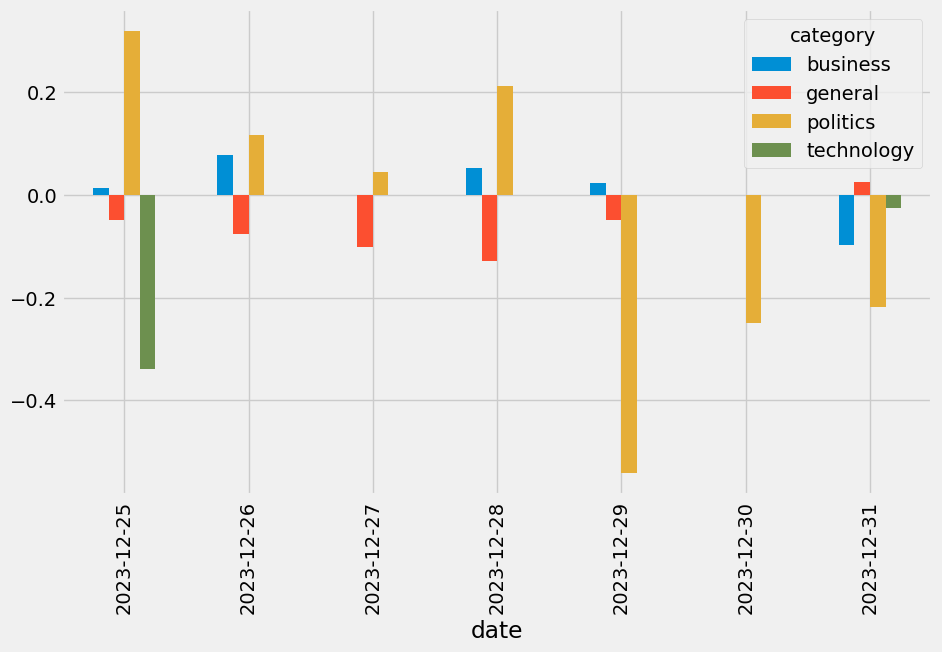

In [8]:
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
%matplotlib inline

# Add the date column
scored_news['date'] = pd.to_datetime(scored_news.published_at).dt.date

# Group by date and category columns from scored_news and calculate the mean
mean_c = scored_news.groupby(['date', 'category'])
mean_c = mean_c['compound'].mean()

# Unstack the column category
mean_c = mean_c.unstack('category')

# Plot a bar chart with pandas
mean_c.plot.bar(figsize = (10, 6))

### Word cloud showing most frequently used words and its sentiment

In [4]:
from nltk import word_tokenize
import string
from nltk.stem import WordNetLemmatizer

# Instantiate lemmatizer
lemma = WordNetLemmatizer()

# Drop the columns that aren't used for the plot
word_df = scored_news.drop(['author', 'description', 'url', 'source', 'image', 'category', 'language', 'country', 'published_at', 'pos', 'neg', 'neu', 'date'], axis=1)

"""
create column 'word' from words in news title
- remove punctuations
- convert plurals to singulars using lemmatizer
"""
word_df['word'] = word_df['title'].apply(
	lambda title: [lemma.lemmatize(word) for word in word_tokenize(title) if word not in string.punctuation]
)
word_df = word_df.explode('word')

# create column 'word_lowercase' for aggregation
word_df['word_lowercase'] = word_df['word'].apply(lambda x: x.lower())

# Group by word and calculate mean compound score for each word
word_df['word_mean_compound'] = word_df.groupby(['word_lowercase'])[['compound']].transform('mean')

# Create sets of word with negative, neutral & positive sentiments
negative_list = set(word_df[word_df['word_mean_compound'] < 0]['word'].to_list())
neutral_list = set(word_df[word_df['word_mean_compound'] == 0]['word'].to_list())
positive_list = set(word_df[word_df['word_mean_compound'] > 0]['word'].to_list())

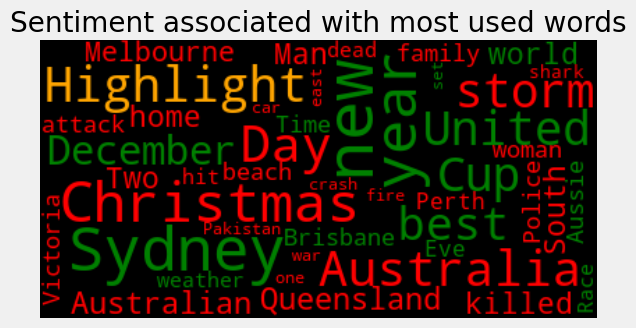

In [10]:
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords

# create stopwords list
custom_stopwords = set(STOPWORDS)
custom_stopwords.update(stopwords.words('english'))
custom_stopwords.update(['say', 'see', 'inc', 'llc', 'corp'])

# combining all news title
text = " ".join(word_df['word'])

# Generate a word cloud image
wordcloud = WordCloud(
    stopwords=custom_stopwords,
    collocations=False,
    max_words=100,
    min_word_length=3,
    min_font_size=12,
    max_font_size=48
).generate(text)

# Mapping color to words
color_to_words = {
    'red': negative_list,
    'orange': neutral_list,
    'green': positive_list
}

# Mapping word to color
word_to_color = {word: color for (color, words) in color_to_words.items() for word in words}

"""
color function to color words according to its sentiment
- negative: red
- positive: green
- neutral: orange
"""
def color_func(word, **kwargs):
    return word_to_color.get(word, 'orange')

# Apply color function
wordcloud.recolor(color_func=color_func)

# Display the word cloud
plt.title('Sentiment associated with most used words')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Summary

This project evaluates the tone of news titles from various media outlets. The aim is to understand what are the most popular topics during the period examined and what is the emotion surrounding those topics.

Data was gathered from mediastack API. For this project, we limited the data to only news from Australia and excluded sports and entertainment categories.  

Sentiment analysis on news titles was done using VADER, a lexicon and rule-based tool that can handle both polarity and intensity of emotions. 

Then the outcome was presented in the format of bar chart and word cloud. 

In the bar char, we plot the average sentiment for each category of news against different dates. This allows us to examine how sentiment of news in each category changes within the week.

In the word cloud, font size is correlated to the frequency of appearance. The more frequently mentioned word will have bigger font size. In addition, the words are colored according to the mean sentiment score of titles it showed up in. Negative sentiment is colored red, positive are colored green and neutral is colored orange. As a result, not only we can easily visualize what were the most talked about topics in the news, we can also gauge the emotions associated with the topic via its color.   